In [1]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_pre_gold.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_mid_gold.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_late_gold.csv')

# pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
# mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
# late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

In [24]:
def runModel(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)
    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)
    # #print accuracy
    # print(classification_report(y_true=test_Y,y_pred=y_predict))
    # #plot tree
    # plt.figure()
    # plt.figure(dpi=200,figsize=(16,10))
    # plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
    # plt.title("Decision tree trained after pruning")
    # plt.show()
    return DCT

In [4]:
# #Grid Search
# X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

# param_grid = [
#         {
#             'max_depth' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

              precision    recall  f1-score   support

         100       0.59      0.69      0.63       969
         200       0.64      0.53      0.58      1001

    accuracy                           0.61      1970
   macro avg       0.61      0.61      0.61      1970
weighted avg       0.61      0.61      0.61      1970



<Figure size 432x288 with 0 Axes>

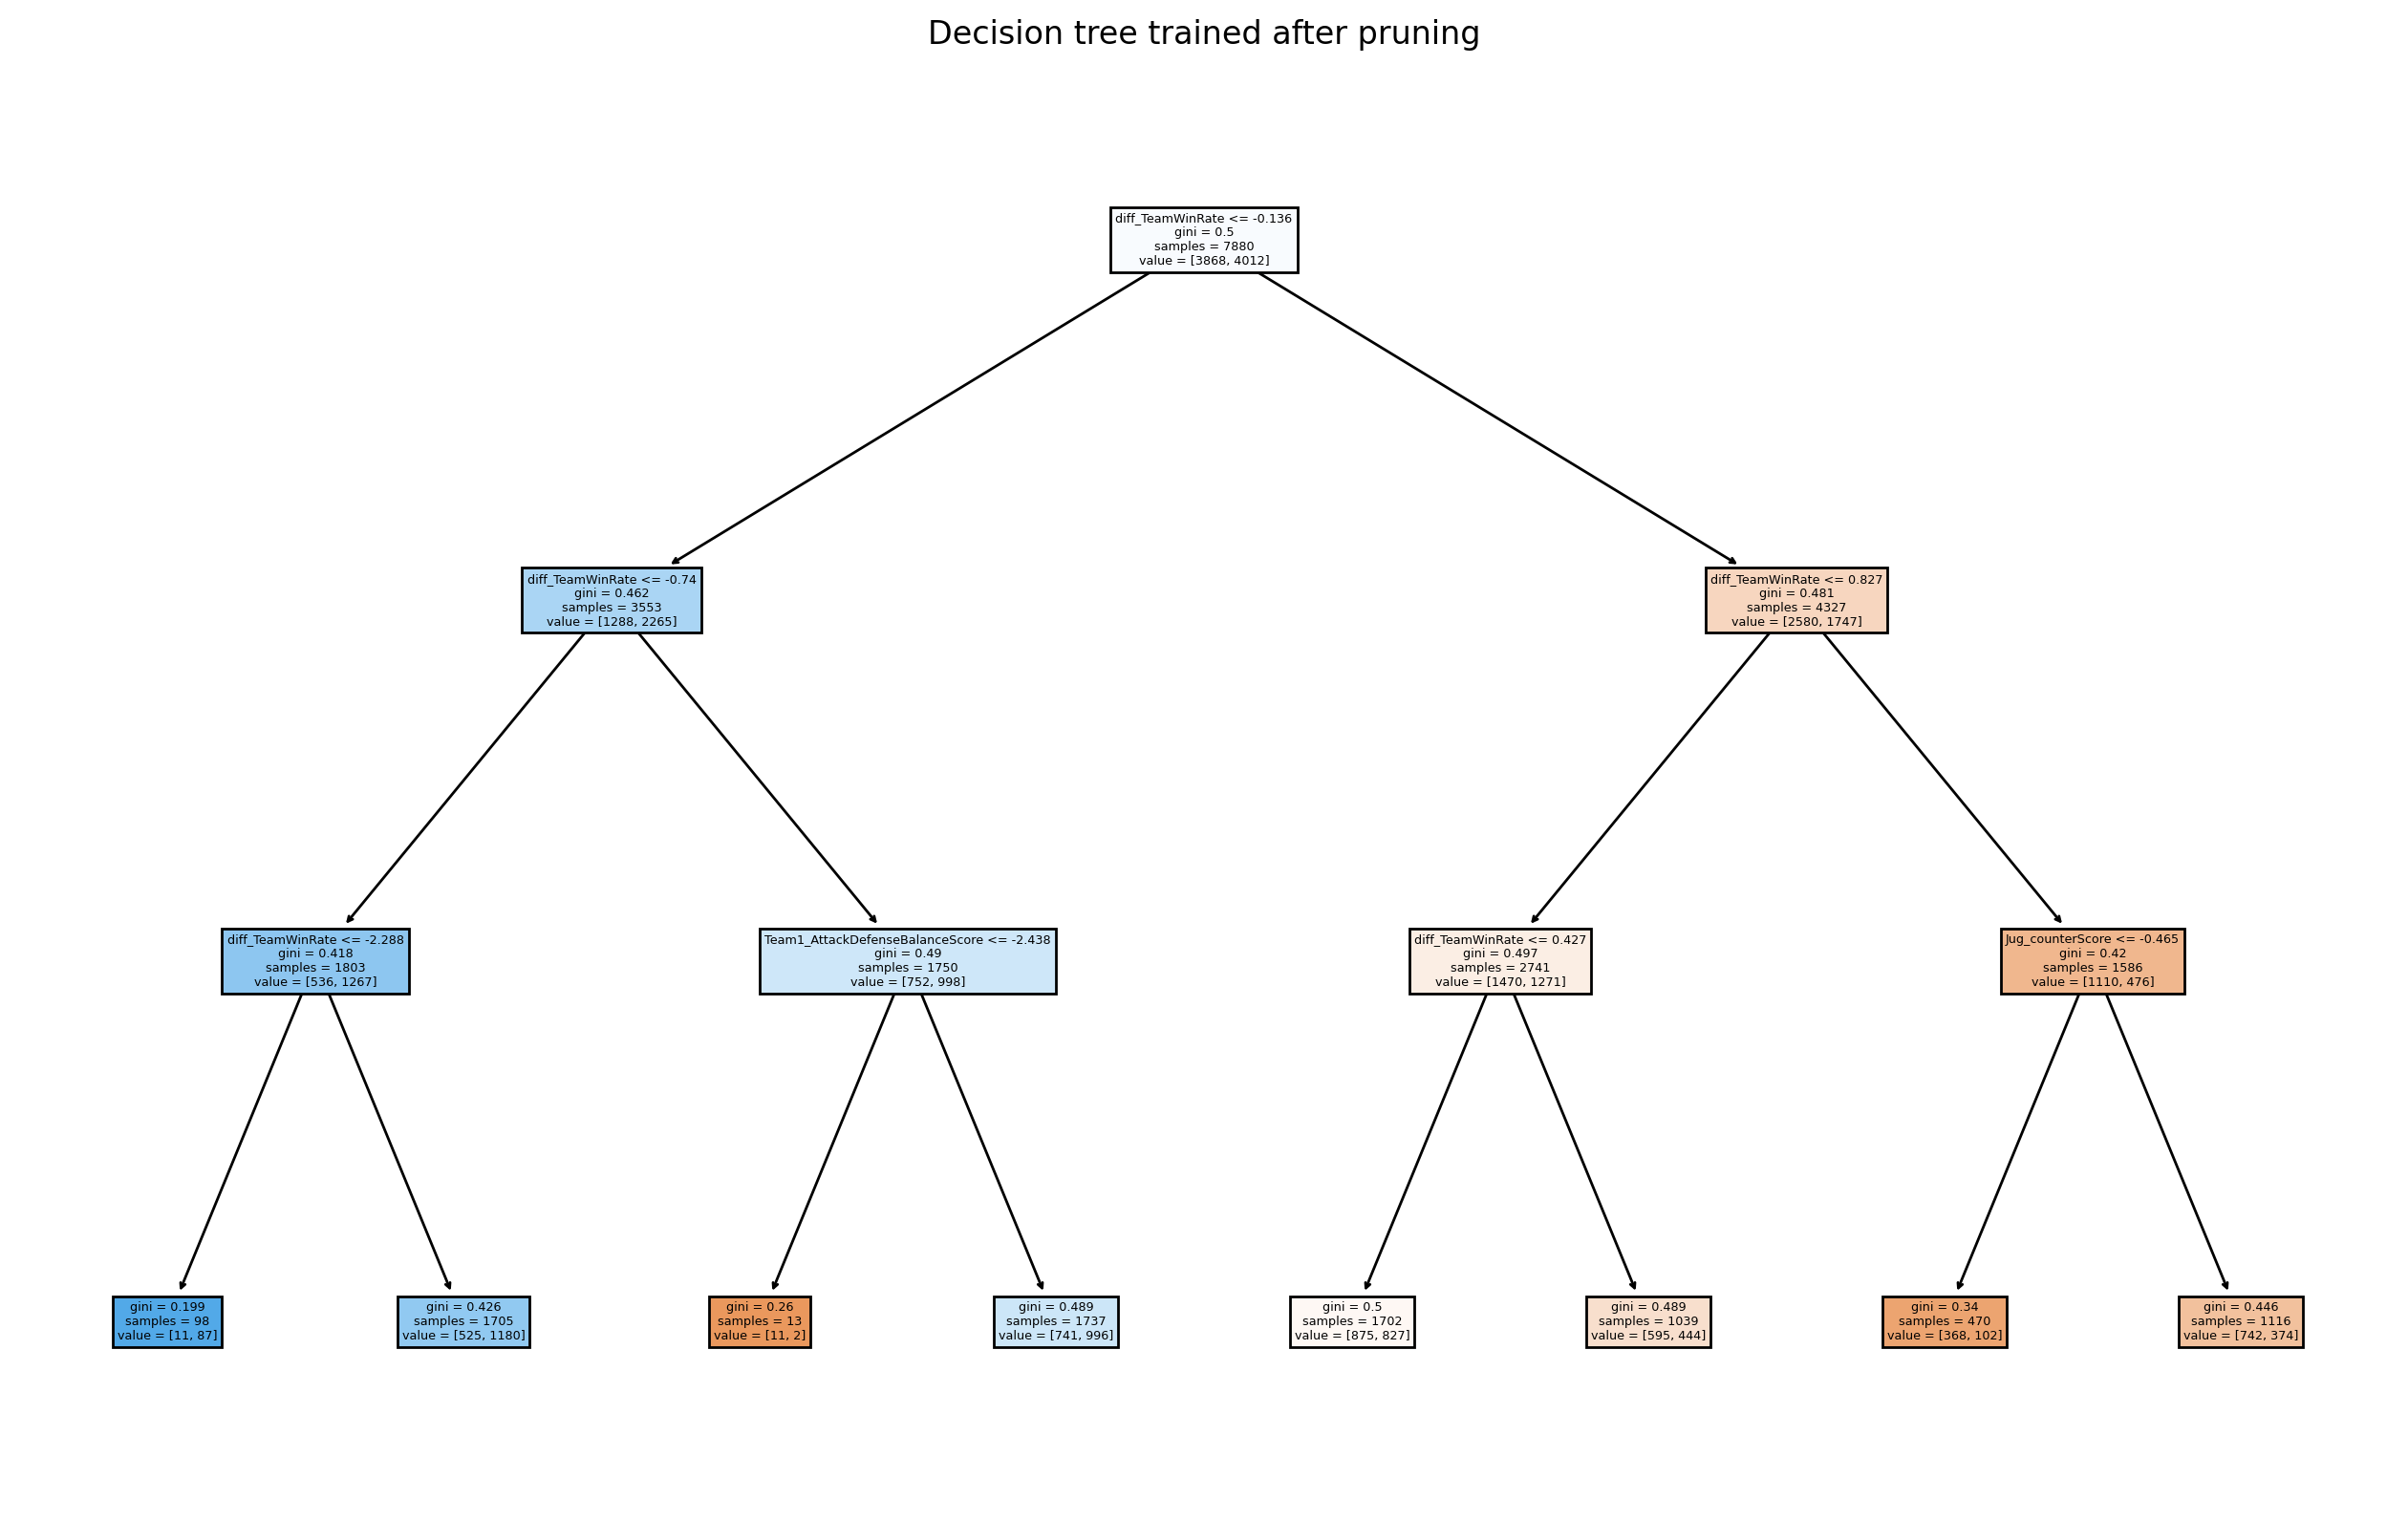

              precision    recall  f1-score   support

         100       0.54      0.60      0.57      4643
         200       0.59      0.53      0.56      5111

    accuracy                           0.56      9754
   macro avg       0.56      0.56      0.56      9754
weighted avg       0.57      0.56      0.56      9754



<Figure size 432x288 with 0 Axes>

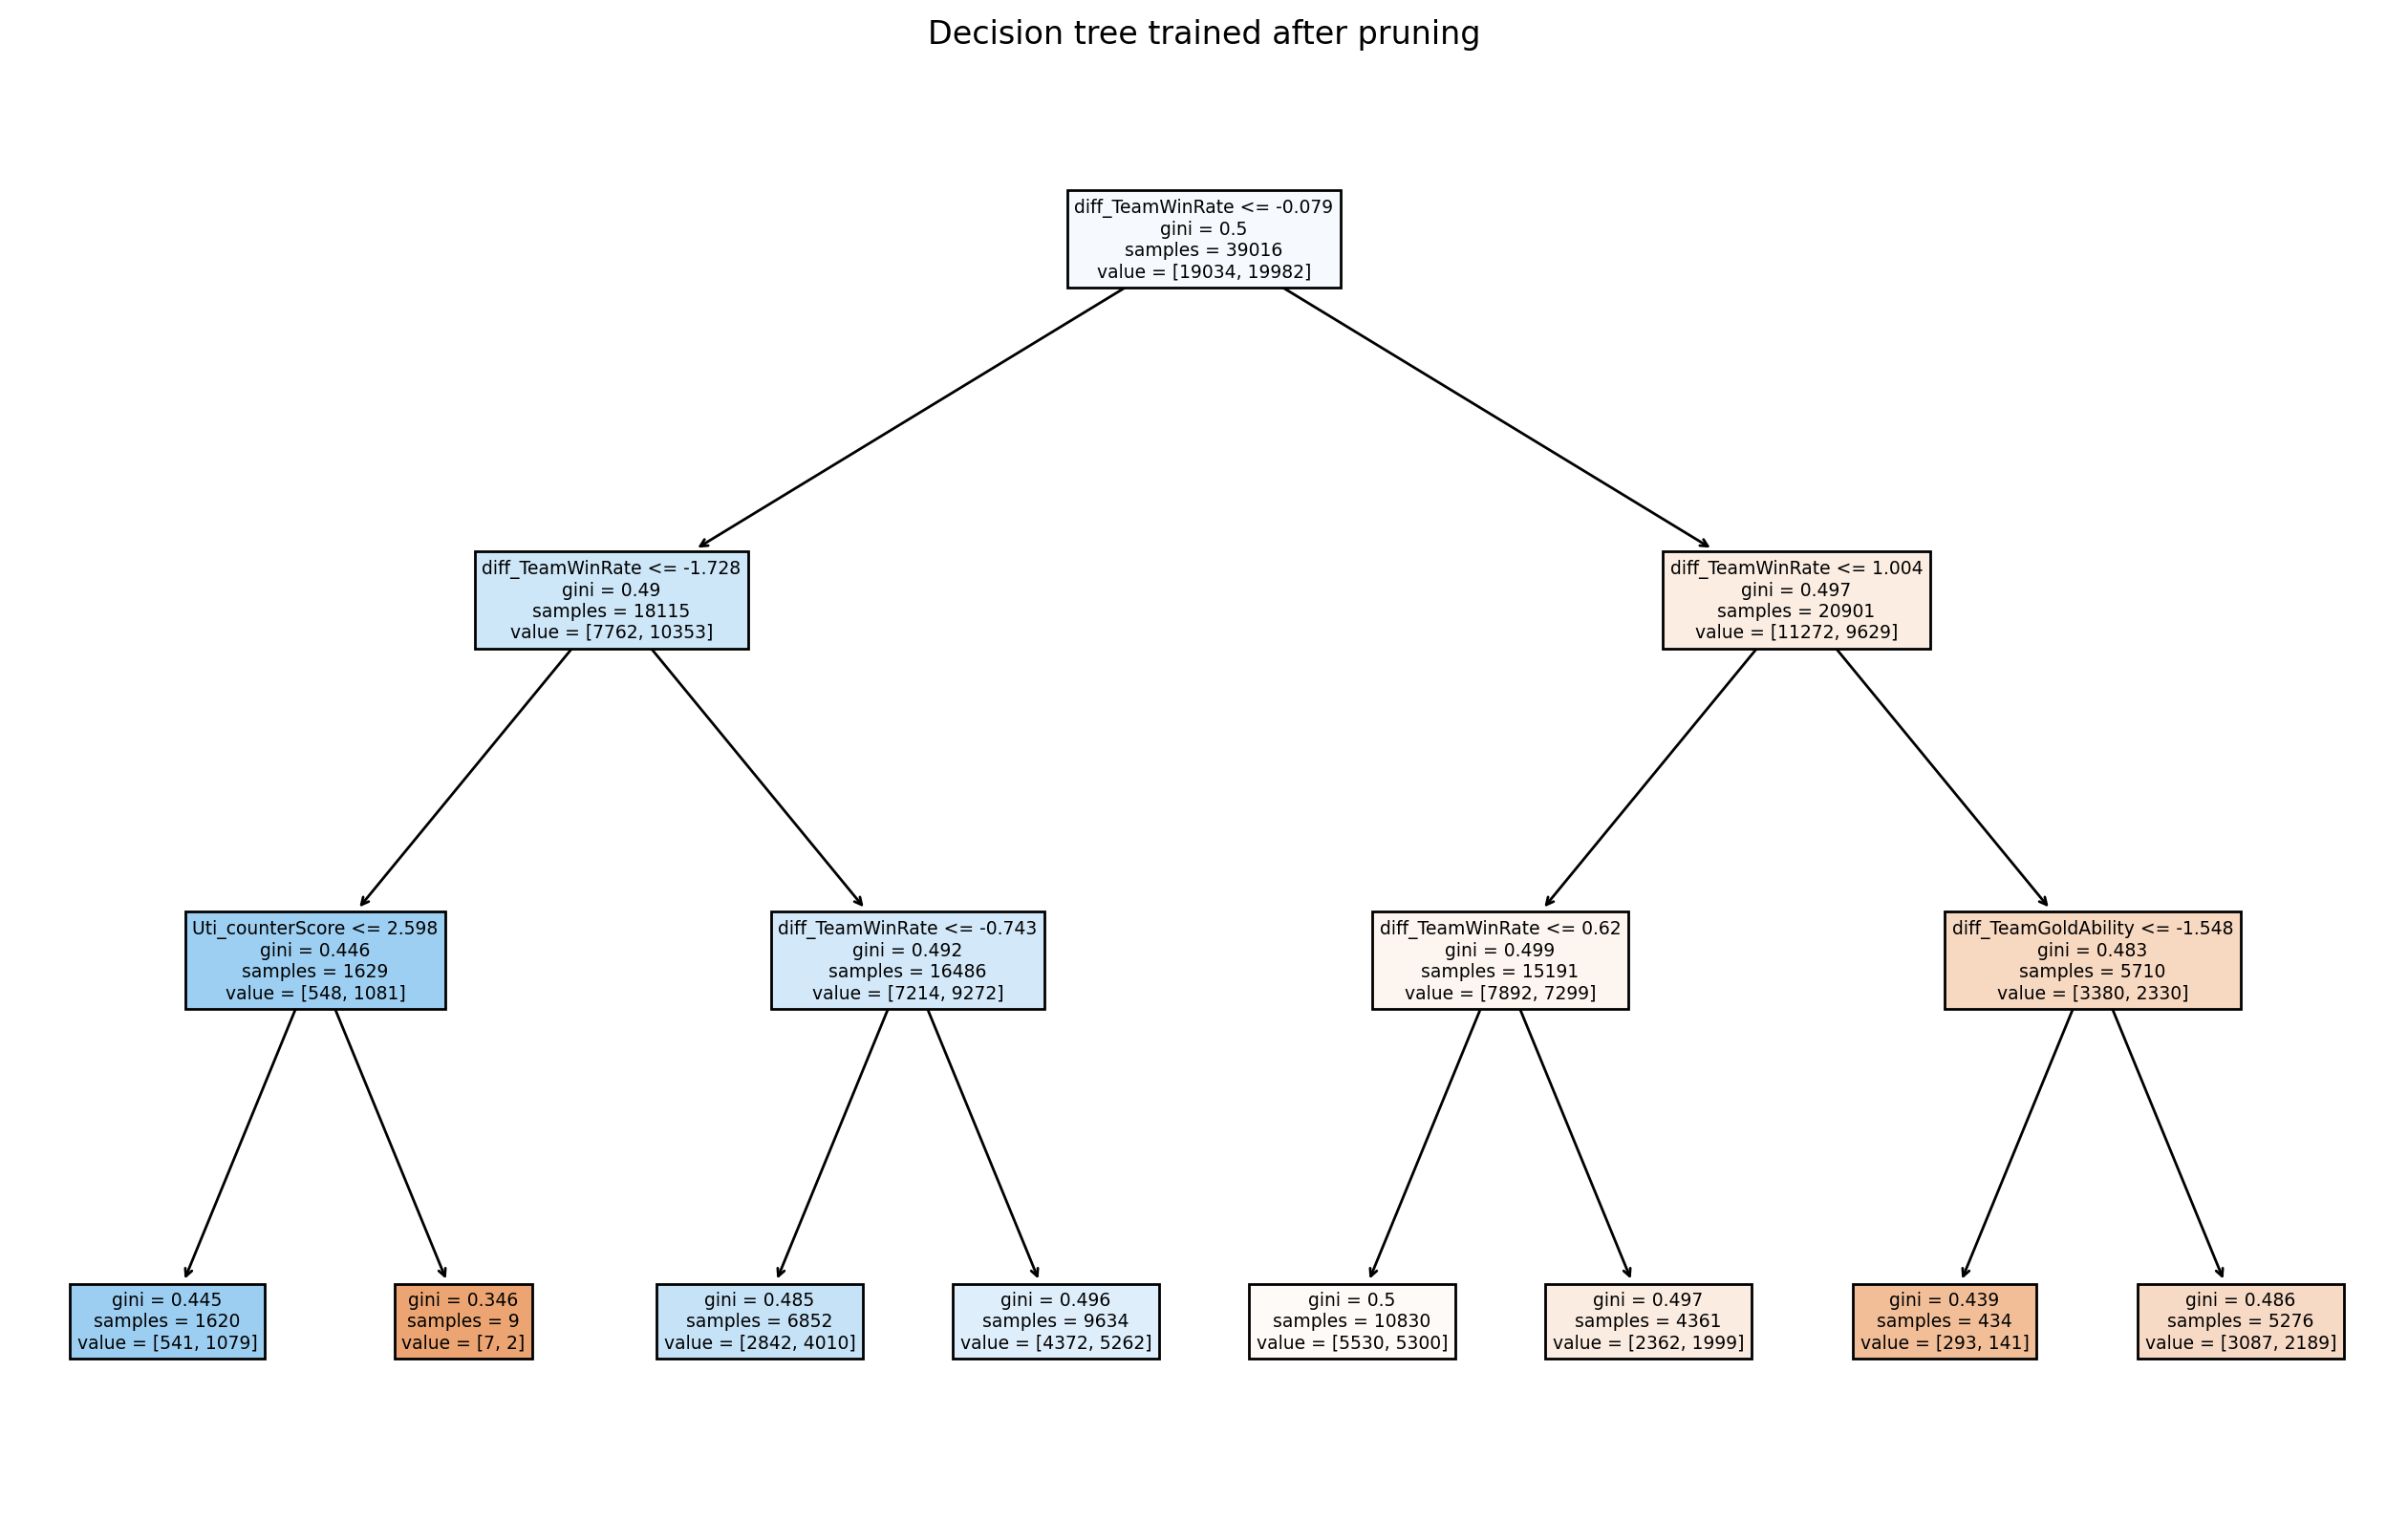

              precision    recall  f1-score   support

         100       0.53      0.55      0.54      2606
         200       0.56      0.54      0.55      2798

    accuracy                           0.55      5404
   macro avg       0.55      0.55      0.55      5404
weighted avg       0.55      0.55      0.55      5404



<Figure size 432x288 with 0 Axes>

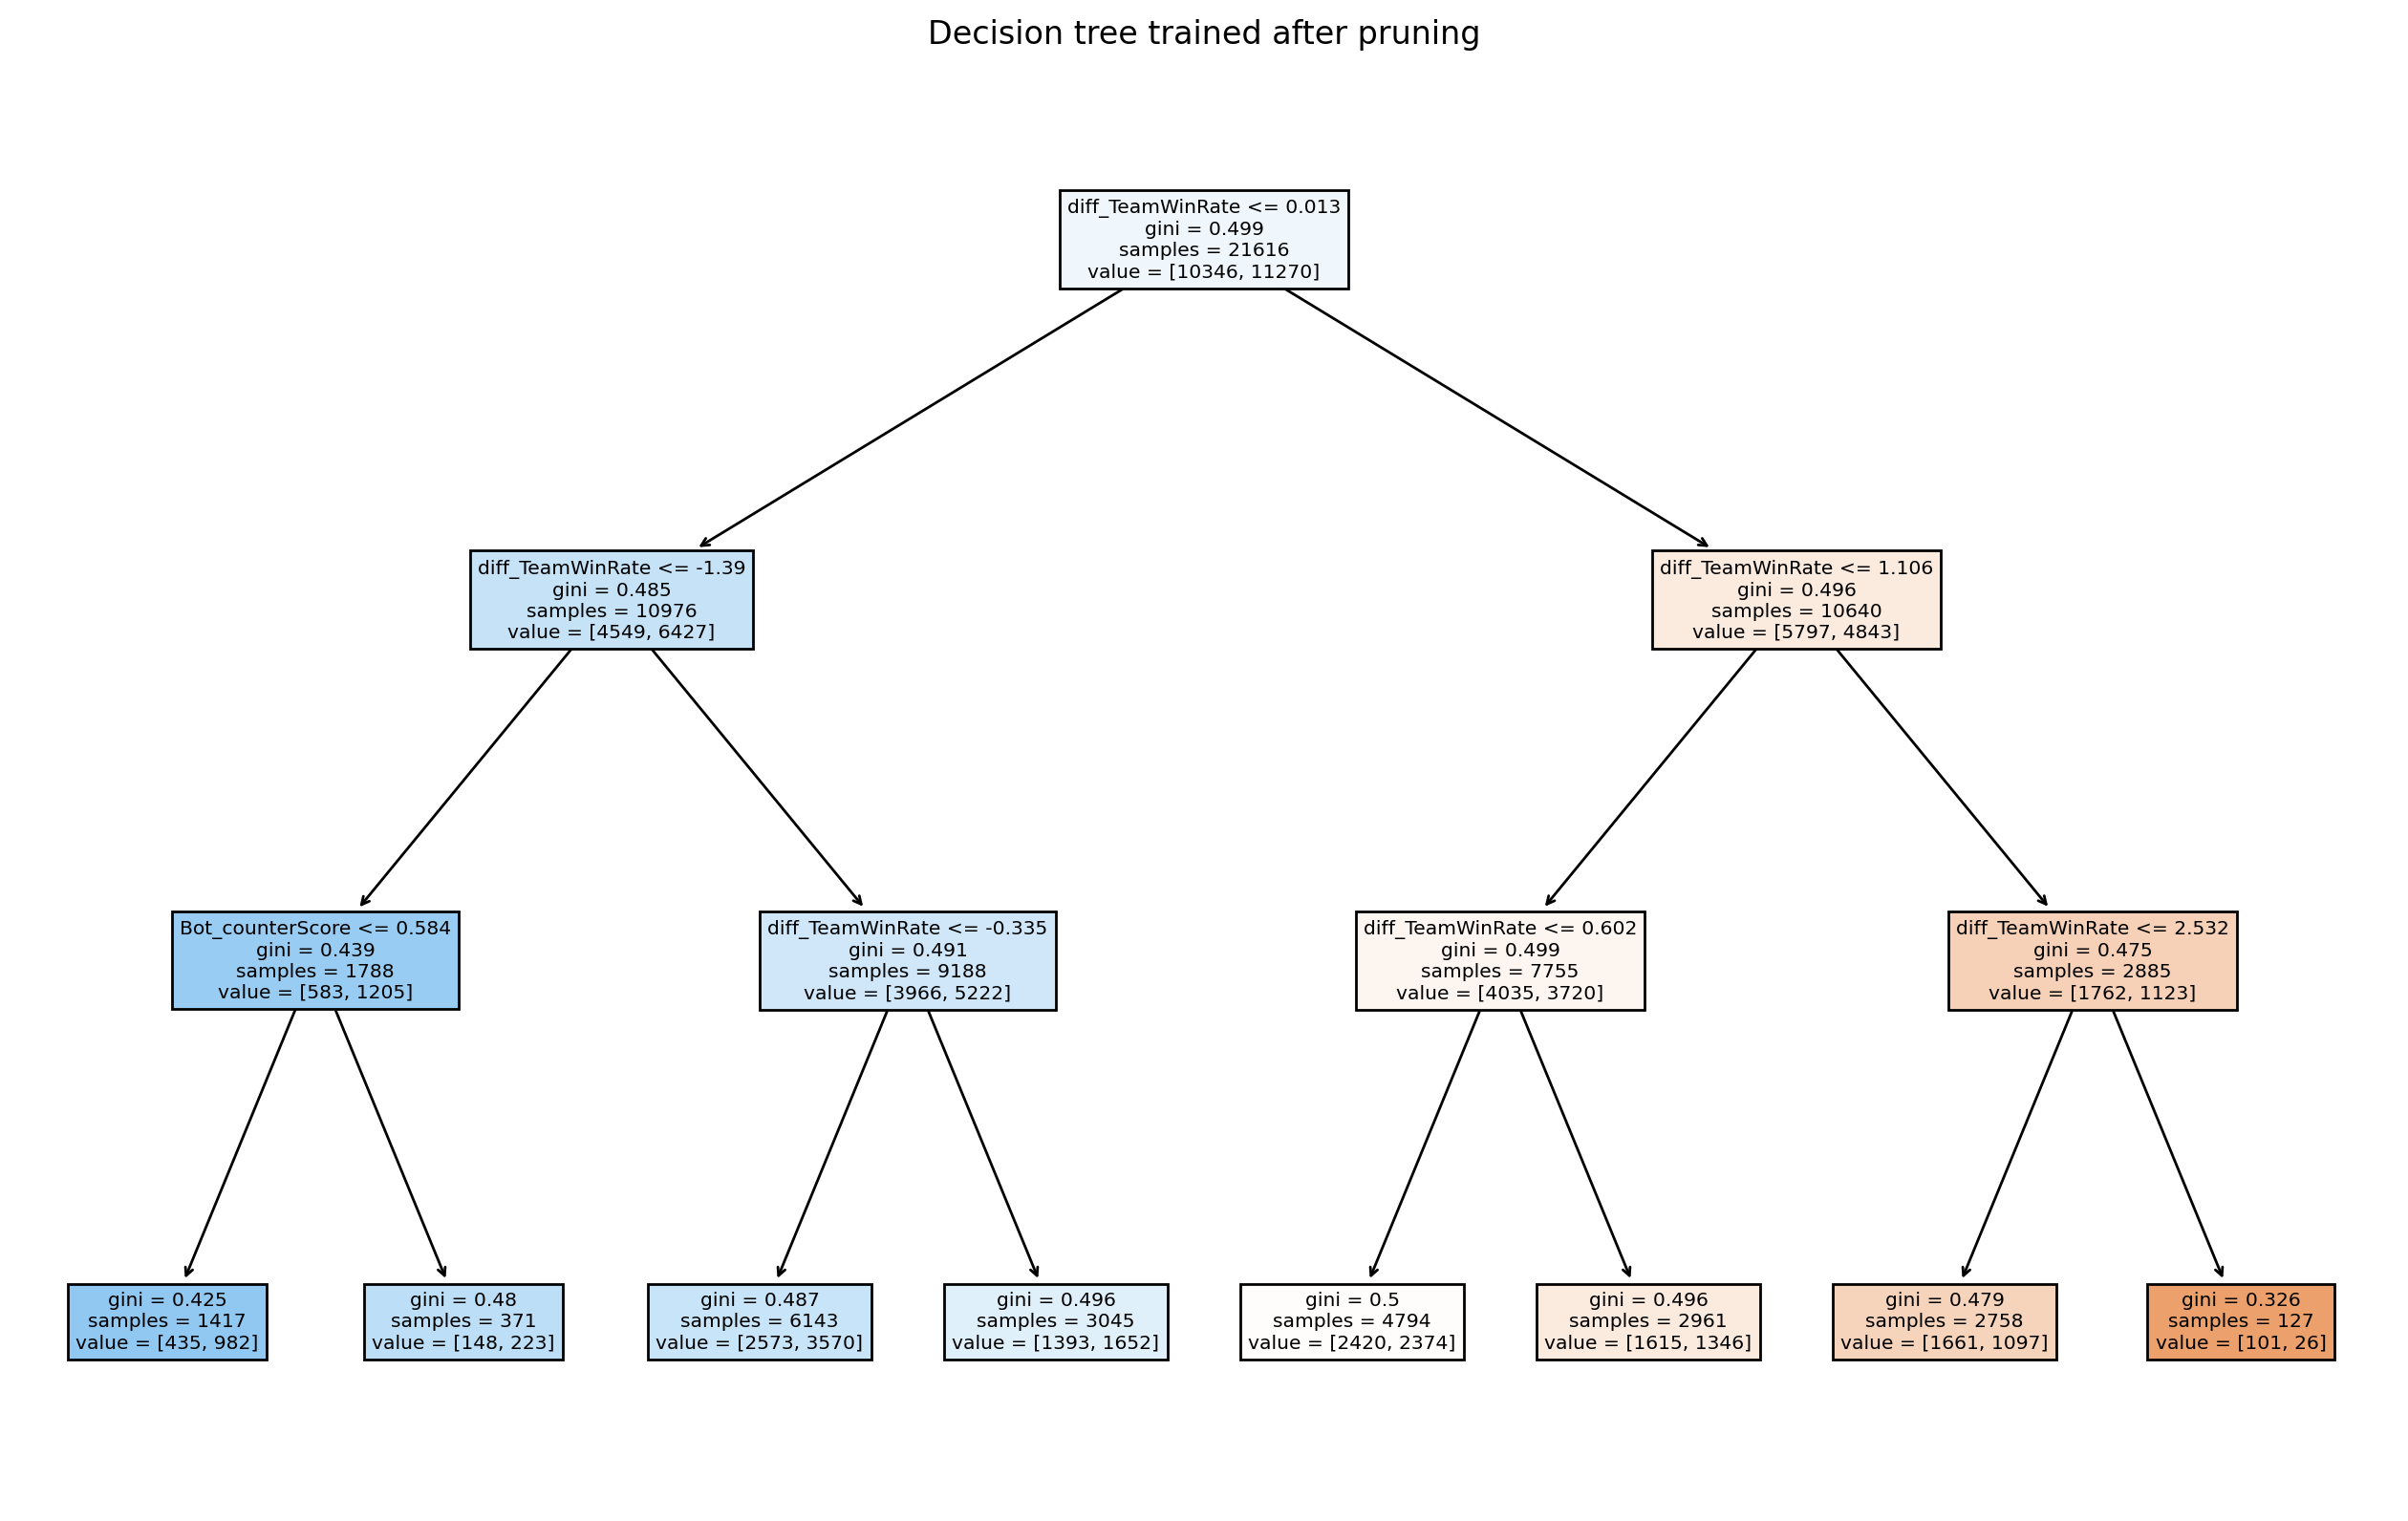

DecisionTreeClassifier(max_depth=3)

In [5]:
runModel(pre,3)
runModel(mid,3)
runModel(late,3)

In [6]:
# import time

# feature_names = [train_X.columns[range(0,11)]]
# start_time = time.time()
# importances = RDF.feature_importances_
# std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
# elapsed_time = time.time() - start_time
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [7]:
# DCT = DecisionTreeClassifier(max_depth=1)
# DCT.fit(train_X,train_Y)
# y_predict = DCT.predict(test_X)

# print(classification_report(y_true=test_Y,y_pred=y_predict))

# #plot the decision tree with unlimited max depth
# plt.figure()
# plt.figure(dpi=800,figsize=(8,5))
# plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
# plt.title("Decision tree trained after pruning")
# plt.show()

In [8]:
# runModel(pre_all,3)
# runModel(mid_all,3)
# runModel(late_all,3)

In [19]:
df_pre = pd.read_csv('./predict_pre.csv')
df_late = pd.read_csv('./predict_late.csv')


In [20]:
df_pre = df_pre.drop(['TeamVictory'],axis=1)
df_late = df_late.drop(['TeamVictory'],axis=1)

In [21]:
df_pre

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,diff_TeamAttackScore,diff_TeamDefenseScore,diff_TeamWinRate,diff_TeamComboCount,diff_TeamControlScore,diff_TeamGoldAbility,Team1_AttackDefenseBalanceScore,Team2_AttackDefenseBalanceScore
0,0.000,0.000000,0.000000,0.000000,0.000000,20.630,14.454,19.492,-1.0,-0.08994,13.3161,-138.596,-144.772
1,0.000,0.000000,0.000000,0.000000,0.000000,114.822,30.852,-4.740,0.0,-0.08890,52.3452,-125.022,-208.992
2,-198.375,288.571429,-2048.571429,-1607.291667,-408.082474,70.996,69.144,3.850,0.0,1.12538,35.5495,-193.612,-195.464


In [25]:
print(list(runModel(pre,3).predict(df_pre)))
print(list(runModel(late,3).predict(df_late)))

[100, 200, 100]
[100, 200, 200]
